In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [2]:
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

In [28]:
print("X shape : " ,x.shape)
print("Y shape : " ,y.shape)

X shape :  (70000, 784)
Y shape :  (70000,)


In [4]:
random_digit = x.to_numpy()[20]
random_digit_image = random_digit.reshape(28,28)

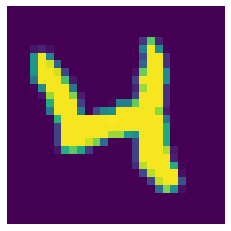

In [5]:
plt.imshow(random_digit_image)
plt.axis('off')
plt.show()

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=88)

# Logistic Regression

In [7]:
modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [8]:
y_predLR = modelLR.predict(x_test)

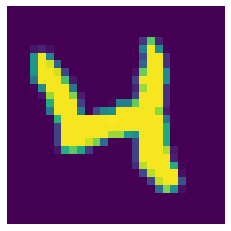

Actual value-  4
Predicted value-  4


In [9]:
random_digit_predictionLR = modelLR.predict(x[20:21])
plt.imshow(random_digit_image)
plt.axis('off')
plt.show()
print("Actual value- ", int(y[20:21].to_numpy()[0]))
print("Predicted value- " ,random_digit_predictionLR[0])

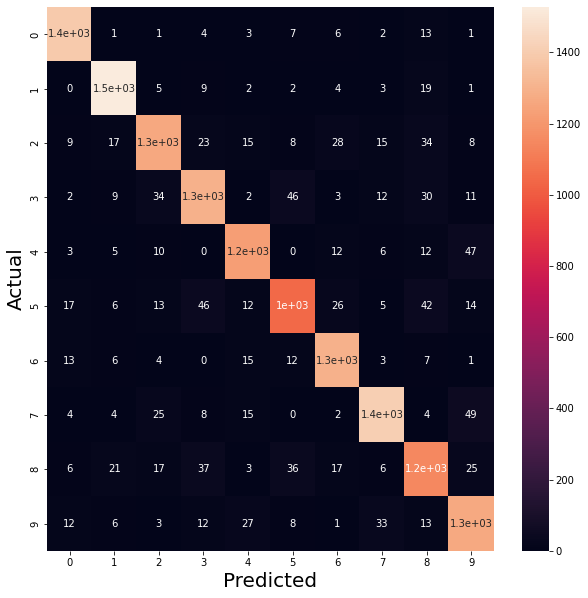

In [10]:
cm = confusion_matrix(y_test, y_predLR)
labels = [0,1,2,3,4,5,6,7,8,9]
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,10))

sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.show()

# Random Forest Classifier

In [11]:
model_RFC=RFC()
model_RFC.fit(x_train,y_train)

RandomForestClassifier()

In [12]:
y_predRFC=model_RFC.predict(x_test)
y_predRFC

array(['5', '6', '6', ..., '7', '5', '3'], dtype=object)

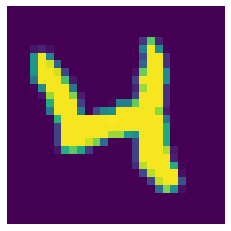

Actual value-  4
Predicted value-  4


In [13]:
random_digit_predictionRFC = model_RFC.predict(x[20:21])
plt.imshow(random_digit_image)
plt.axis('off')
plt.show()
print("Actual value- ", int(y[20:21].to_numpy()[0]))
print("Predicted value- " ,random_digit_predictionRFC[0])

In [14]:
model_RFC.score(x_test,y_test)

0.9683571428571428

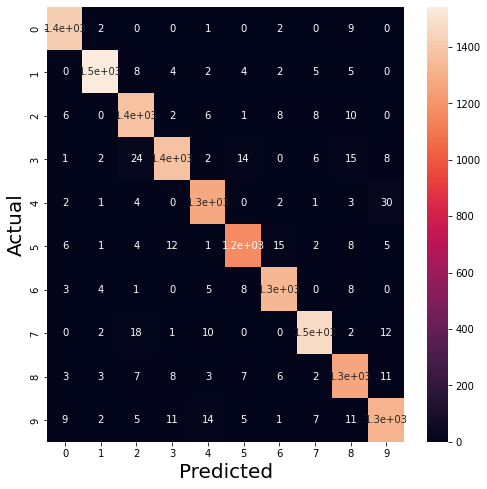

In [15]:
cm = confusion_matrix(y_test, y_predRFC)
labels = [0,1,2,3,4,5,6,7,8,9]
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (8,8))

sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.show()

# K Nearest Neighbors (KNN)

In [16]:
model_knn = KNeighborsClassifier()

In [17]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [18]:
y_predKNN = model_knn.predict(x_test)
y_predKNN

array(['5', '6', '6', ..., '7', '5', '3'], dtype=object)

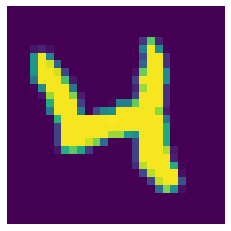

Actual value-  4
Predicted value-  4


In [19]:
random_digit_predictionKNN = model_knn.predict(x[20:21])
plt.imshow(random_digit_image)
plt.axis('off')
plt.show()
print("Actual value- ", int(y[20:21].to_numpy()[0]))
print("Predicted value- " ,random_digit_predictionKNN[0])

In [20]:
model_knn.score(x_test,y_test)

0.9719285714285715

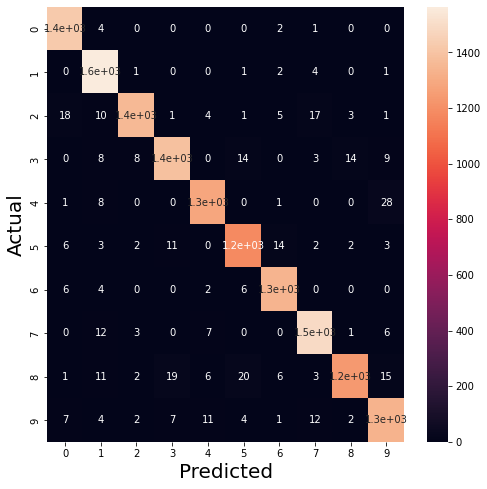

In [21]:
cm = confusion_matrix(y_test, y_predKNN)
labels = [0,1,2,3,4,5,6,7,8,9]
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (8,8))

sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.show()

# Decision Trees

In [22]:
model_dt= tree.DecisionTreeClassifier(random_state=10)

In [23]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [24]:
y_predDT = model_dt.predict(x_test)
y_predDT

array(['5', '6', '5', ..., '7', '5', '3'], dtype=object)

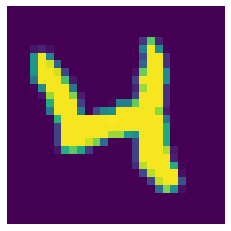

Actual value-  4
Predicted value-  4


In [25]:
random_digit_predictionDT = model_dt.predict(x[20:21])
plt.imshow(random_digit_image)
plt.axis('off')
plt.show()
print("Actual value- ", int(y[20:21].to_numpy()[0]))
print("Predicted value- " ,random_digit_predictionDT[0])

In [26]:
accuracy_score(y_test, y_predDT)

0.8689285714285714

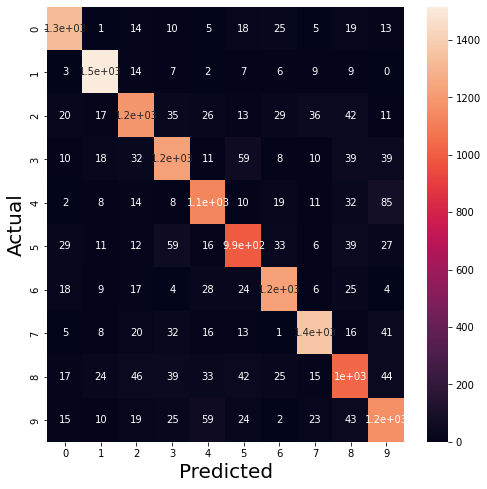

In [27]:
cm = confusion_matrix(y_test, y_predDT)
labels = [0,1,2,3,4,5,6,7,8,9]
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (8,8))

sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.show()